# Regression Week 3: Assessing Fit (polynomial regression)

In this notebook you will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic. In particular you will:
* Write a function to take an SArray and a degree and return an SFrame where each column is the SArray to a polynomial value up to the total degree e.g. degree = 3 then column 1 is the SArray column 2 is the SArray squared and column 3 is the SArray cubed
* Use matplotlib to visualize polynomial regressions
* Use matplotlib to visualize the same polynomial degree on different subsets of the data
* Use a validation set to select a polynomial degree
* Assess the final fit using test data

We will continue to use the House data from previous notebooks.

# Fire up Turi Create

In [1]:
#import turicreate
import pandas as pd
import numpy as np
import os


Next we're going to write a polynomial function that takes an SArray and a maximal degree and returns an SFrame with columns containing the SArray to all the powers up to the maximal degree.

The easiest way to apply a power to an SArray is to use the .apply() and lambda x: functions. 
For example to take the example array and compute the third power we can do as follows: (note running this cell the first time may take longer than expected since it loads Turi Create)

In [40]:
#tmp = pd.DataFrame([1., 2., 3.])
#tmp_cubed = tmp.apply(lambda x: x**3)
tmp = np.array([1., 2., 3.])
print (tmp)
#print (tmp_cubed)

[1. 2. 3.]


We can create an empty SFrame using turicreate.SFrame() and then add any columns to it with ex_sframe['column_name'] = value. For example we create an empty SFrame and make the column 'power_1' to be the first power of tmp (i.e. tmp itself).

In [41]:
#ex_sframe = turicreate.SFrame()
#ex_sframe['power_1'] = tmp
#print ex_sframe

# Polynomial_sframe function

Using the hints above complete the following function to create an SFrame consisting of the powers of an SArray up to a specific degree:

In [42]:
# first thing, understand what is format of feature

def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    #poly_sframe = turicreate.SFrame()
    poly_sframe = pd.DataFrame()
    print(feature)
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature

    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name] = poly_sframe['power_1'].apply(lambda x: x**power)
    return poly_sframe

To test your function consider the smaller tmp variable and what you would expect the outcome of the following call:

In [43]:
print (polynomial_sframe(tmp, 3))

[1. 2. 3.]
   power_1  power_2  power_3
0      1.0      1.0      1.0
1      2.0      4.0      8.0
2      3.0      9.0     27.0


# Visualizing polynomial regression

Let's use matplotlib to visualize what a polynomial regression looks like on some real data.

In [2]:
#sales = turicreate.SFrame('home_data.sframe/')
from pathlib import Path
folder_path = os.path.abspath('REG03-NB01')
file_path = os.path.dirname(os.path.dirname(folder_path))

sales = pd.read_csv(file_path + '\data\kc_house_data.csv')


print(file_path + '\data\kc_house_data.csv')
print(sales.head())

C:\Users\bblje\Documents\GitHub\ml_regression_UW\data\kc_house_data.csv
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        16

As in Week 3, we will use the sqft_living variable. For plotting purposes (connecting the dots), you'll need to sort by the values of sqft_living. For houses with identical square footage, we break the tie by their prices.

In [54]:
sales = sales.sort_values(by=['sqft_living', 'price'])

Let's start with a degree 1 polynomial using 'sqft_living' (i.e. a line) to predict 'price' and plot what it looks like.

In [56]:
poly1_data = polynomial_sframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price'] # add price to the data since it's the target

print(poly1_data.head())

19452      290
15381      370
860        380
18379      384
4868       390
         ...  
8092      9640
9254      9890
3914     10040
7252     12050
12777    13540
Name: sqft_living, Length: 21613, dtype: int64
       power_1     price
19452      290  142000.0
15381      370  276000.0
860        380  245000.0
18379      384  265000.0
4868       390  228000.0


NOTE: for all the models in this notebook use validation_set = None to ensure that all results are consistent across users.

In [74]:
from sklearn import linear_model

model1 = linear_model.LinearRegression()

x = poly1_data['power_1']
x = np.array(x).reshape(-1, 1)
y = poly1_data['price']
model1.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
#let's take a look at the weights before we plot
print(model1.intercept_)
print(model1.coef_)

print(poly1_data.head())

-43580.74309447396
[280.6235679]
       power_1     price
19452      290  142000.0
15381      370  276000.0
860        380  245000.0
18379      384  265000.0
4868       390  228000.0


In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

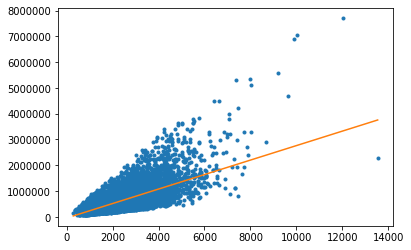

In [82]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
         poly1_data['power_1'], model1.predict(np.array(poly1_data['power_1']).reshape(-1,1)), '-')

Let's unpack that plt.plot() command. The first pair of SArrays we passed are the 1st power of sqft and the actual price we then ask it to print these as dots '.'. The next pair we pass is the 1st power of sqft and the predicted values from the linear model. We ask these to be plotted as a line '-'. 

We can see, not surprisingly, that the predicted values all fall on a line, specifically the one with slope 280 and intercept -43579. What if we wanted to plot a second degree polynomial?

In [83]:
poly2_data = polynomial_sframe(sales['sqft_living'], 2)
#print(poly2_data.columns)
my_features = poly2_data.columns # get the name of the features
poly2_data['price'] = sales['price'] # add price to the data since it's the target
print(poly2_data.head())
#model2 = turicreate.linear_regression.create(poly2_data, target = 'price', features = my_features, validation_set = None)

model2 = linear_model.LinearRegression()

x = poly2_data[['power_1', 'power_2']]
y = poly2_data['price']
model2.fit(x,y)

19452      290
15381      370
860        380
18379      384
4868       390
         ...  
8092      9640
9254      9890
3914     10040
7252     12050
12777    13540
Name: sqft_living, Length: 21613, dtype: int64
       power_1  power_2     price
19452      290    84100  142000.0
15381      370   136900  276000.0
860        380   144400  245000.0
18379      384   147456  265000.0
4868       390   152100  228000.0


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
print(model2.intercept_)
print(model2.coef_)

199222.27930548496
[6.79940947e+01 3.85812609e-02]


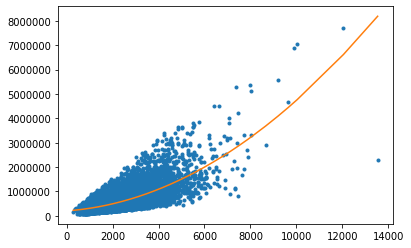

In [86]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
         poly2_data['power_1'], model2.predict(poly2_data[['power_1','power_2']]),'-')

The resulting model looks like half a parabola. Try on your own to see what the cubic looks like:

In [88]:
poly3_data = polynomial_sframe(sales['sqft_living'], 3)
#print(poly2_data.columns)
my_features = poly3_data.columns # get the name of the features
poly3_data['price'] = sales['price'] # add price to the data since it's the target
print(poly3_data.head())
#model2 = turicreate.linear_regression.create(poly2_data, target = 'price', features = my_features, validation_set = None)

model3 = linear_model.LinearRegression()

x = poly3_data[['power_1', 'power_2', 'power_3']]
y = poly3_data['price']
model3.fit(x,y)

19452      290
15381      370
860        380
18379      384
4868       390
         ...  
8092      9640
9254      9890
3914     10040
7252     12050
12777    13540
Name: sqft_living, Length: 21613, dtype: int64
       power_1  power_2   power_3     price
19452      290    84100  24389000  142000.0
15381      370   136900  50653000  276000.0
860        380   144400  54872000  245000.0
18379      384   147456  56623104  265000.0
4868       390   152100  59319000  228000.0


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

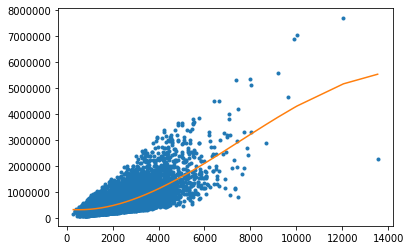

In [92]:
x_input = poly3_data[['power_1']]
y_actual = poly3_data['price']
y_pre = model3.predict(poly3_data[['power_1', 'power_2', 'power_3']])

plt.plot(x_input, y_actual, '.',
        x_input, y_pre, '-')

Now try a 15th degree polynomial:

In [97]:
poly15_data = polynomial_sframe(sales['sqft_living'], 15)
#print(poly2_data.columns)
my_features = poly15_data.columns # get the name of the features
poly15_data['price'] = sales['price'] # add price to the data since it's the target
print(poly15_data.head())
#model2 = turicreate.linear_regression.create(poly2_data, target = 'price', features = my_features, validation_set = None)

model15 = linear_model.LinearRegression()



19452      290
15381      370
860        380
18379      384
4868       390
         ...  
8092      9640
9254      9890
3914     10040
7252     12050
12777    13540
Name: sqft_living, Length: 21613, dtype: int64
       power_1  power_2   power_3      power_4        power_5  \
19452      290    84100  24389000   7072810000  2051114900000   
15381      370   136900  50653000  18741610000  6934395700000   
860        380   144400  54872000  20851360000  7923516800000   
18379      384   147456  56623104  21743271936  8349416423424   
4868       390   152100  59319000  23134410000  9022419900000   

                power_6              power_7                power_8  \
19452   594823321000000   172498763090000000   50024641296100000000   
15381  2565726409000000   949318771330000000  351247945392100000000   
860    3010936384000000  1144155825920000000  434779213849600000000   
18379  3206175906594816  1231171548132409344  472769874482845188096   
4868   3518743761000000  13723100667900000

In [107]:
x_range = [x for x in range(0,15)]
print(x_range)
x = poly15_data.iloc[:,x_range]
print(x.columns)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Index(['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6',
       'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12',
       'power_13', 'power_14', 'power_15'],
      dtype='object')


In [108]:
x = poly15_data.iloc[:,x_range]
y = poly15_data['price']
model15.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

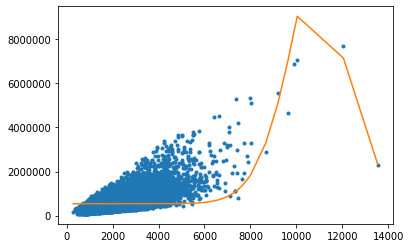

In [111]:
x_input = poly15_data[['power_1']]
y_actual = poly15_data['price']
y_pre = model15.predict(poly15_data.iloc[:,x_range])

plt.plot(x_input, y_actual, '.',
        x_input, y_pre, '-')

What do you think of the 15th degree polynomial? Do you think this is appropriate? If we were to change the data do you think you'd get pretty much the same curve? Let's take a look.

# Changing the data and re-learning

We're going to split the sales data into four subsets of roughly equal size. Then you will estimate a 15th degree polynomial model on all four subsets of the data. Print the coefficients (you should use .print_rows(num_rows = 16) to view all of them) and plot the resulting fit (as we did above). The quiz will ask you some questions about these results.

To split the sales data into four subsets, we perform the following steps:
* First split sales into 2 subsets with `.random_split(0.5, seed=0)`. 
* Next split the resulting subsets into 2 more subsets each. Use `.random_split(0.5, seed=0)`.

We set `seed=0` in these steps so that different users get consistent results.
You should end up with 4 subsets (`set_1`, `set_2`, `set_3`, `set_4`) of approximately equal size. 

In [138]:
set_1 = pd.read_csv(file_path + '\data\wk3_kc_house_set_1_data.csv')
set_2 = pd.read_csv(file_path + '\data\wk3_kc_house_set_2_data.csv')
set_3 = pd.read_csv(file_path + '\data\wk3_kc_house_set_3_data.csv')
set_4 = pd.read_csv(file_path + '\data\wk3_kc_house_set_4_data.csv')

for i in range(1,2):
    data_path = file_path + '\data\wk3_kc_house_set_' + str(i) + '_data.csv'
    file_name = 'set_' + str(i)
    print(file_name)
    file_name = pd.read_csv(data_path)
#print(file_name)


set_1


Fit a 15th degree polynomial on set_1, set_2, set_3, and set_4 using sqft_living to predict prices. Print the coefficients and make a plot of the resulting model.

0         430
1         460
2         470
3         490
4         500
        ...  
5399     8000
5400     8010
5401     8670
5402    12050
5403    13540
Name: sqft_living, Length: 5404, dtype: int64
Index(['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6',
       'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12',
       'power_13', 'power_14', 'power_15'],
      dtype='object')
539058.8186679217 [ 3.05794168e-90 -1.69394947e-49 -5.61767568e-55 -4.97841222e-60
  3.23082736e-74  1.10358333e-70  8.37724029e-67  6.23411957e-63
  4.49156442e-59  3.06938763e-55  1.91749300e-51  1.01335180e-47
  3.62176959e-44 -5.63501661e-48  2.18641116e-52]


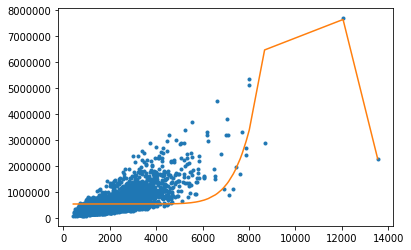

In [154]:
# set_1 data prepare
x_train = polynomial_sframe(set_1['sqft_living'], 15)
#my_features = set_1_15.columns # get the name of the features
y_act = set_1['price']
print(x_train.columns)

# train model
model_1_15 = linear_model.LinearRegression()
model_1_15.fit(x_train, y_act)

# predict
y_predict = model_1_15.predict(x_train)

# plot actual and predicted values
plt.plot(set_1['sqft_living'], y_act, '.',
        set_1['sqft_living'], y_predict, '-')
print(model_1_15.intercept_, model_1_15.coef_)

0        390
1        410
2        420
3        420
4        440
        ... 
5393    7270
5394    7440
5395    7480
5396    7730
5397    9200
Name: sqft_living, Length: 5398, dtype: int64
Index(['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6',
       'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12',
       'power_13', 'power_14', 'power_15'],
      dtype='object')


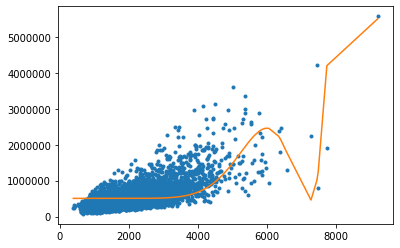

In [151]:
# set_2 data prepare
x_train = polynomial_sframe(set_2['sqft_living'], 15)
#my_features = set_1_15.columns # get the name of the features
y_act = set_2['price']
print(x_train.columns)

# train model
model_2_15 = linear_model.LinearRegression()
model_2_15.fit(x_train, y_act)

# predict
y_predict = model_2_15.predict(x_train)

# plot actual and predicted values
plt.plot(set_2['sqft_living'], y_act, '.',
        set_2['sqft_living'], y_predict, '-')

0         390
1         480
2         480
3         520
4         520
        ...  
5404     7220
5405     7400
5406     9640
5407     9890
5408    10040
Name: sqft_living, Length: 5409, dtype: int64
Index(['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6',
       'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12',
       'power_13', 'power_14', 'power_15'],
      dtype='object')


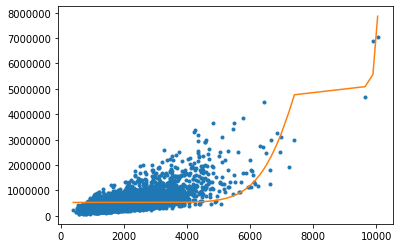

In [152]:
# set_3 data prepare
x_train = polynomial_sframe(set_3['sqft_living'], 15)
#my_features = set_1_15.columns # get the name of the features
y_act = set_3['price']
print(x_train.columns)

# train model
model_3_15 = linear_model.LinearRegression()
model_3_15.fit(x_train, y_act)

# predict
y_predict = model_3_15.predict(x_train)

# plot actual and predicted values
plt.plot(set_3['sqft_living'], y_act, '.',
        set_3['sqft_living'], y_predict, '-')

0        290
1        370
2        380
3        384
4        470
        ... 
5397    6880
5398    7080
5399    7350
5400    7390
5401    8020
Name: sqft_living, Length: 5402, dtype: int64
Index(['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6',
       'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12',
       'power_13', 'power_14', 'power_15'],
      dtype='object')


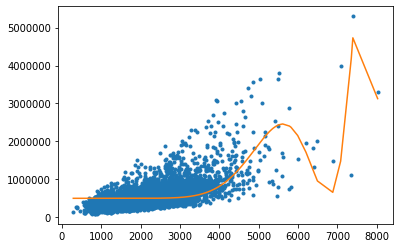

In [153]:
# set_4 data prepare
x_train = polynomial_sframe(set_4['sqft_living'], 15)
#my_features = set_1_15.columns # get the name of the features
y_act = set_4['price']
print(x_train.columns)

# train model
model_4_15 = linear_model.LinearRegression()
model_4_15.fit(x_train, y_act)

# predict
y_predict = model_4_15.predict(x_train)

# plot actual and predicted values
plt.plot(set_4['sqft_living'], y_act, '.',
        set_4['sqft_living'], y_predict, '-')

Some questions you will be asked on your quiz:

**Quiz Question: Is the sign (positive or negative) for power_15 the same in all four models?**

**Quiz Question: (True/False) the plotted fitted lines look the same in all four plots**

In [156]:
print(model_1_15.intercept_, model_1_15.coef_)
print(model_2_15.intercept_, model_2_15.coef_)
print(model_3_15.intercept_, model_3_15.coef_)
print(model_4_15.intercept_, model_4_15.coef_)

539058.8186679217 [ 3.05794168e-90 -1.69394947e-49 -5.61767568e-55 -4.97841222e-60
  3.23082736e-74  1.10358333e-70  8.37724029e-67  6.23411957e-63
  4.49156442e-59  3.06938763e-55  1.91749300e-51  1.01335180e-47
  3.62176959e-44 -5.63501661e-48  2.18641116e-52]
506856.1316205913 [ 2.71335949e-77  7.33541090e-39 -1.85014814e-44  8.44628222e-50
  5.73786179e-71  1.51934987e-58  3.64549616e-55  1.50416258e-51
  5.76015665e-48  1.95770497e-44  5.39396539e-41  9.40376360e-38
 -3.63529141e-41  4.65476524e-45 -1.97199121e-49]
530874.3166533422 [ 2.83751934e-88 -7.80224128e-49 -1.38770849e-55 -3.98272978e-59
  1.57170169e-72  4.27894908e-69  2.68009626e-65  1.63911362e-61
  9.66435015e-58  5.38044653e-54  2.72563636e-50  1.16253248e-46
  3.33756141e-43 -6.76238818e-47  3.43132932e-51]
494819.18487209524 [ 1.37116050e-76  2.79678221e-40 -2.13063863e-44 -2.19910713e-49
  2.58420337e-70  5.29002498e-58  1.27070046e-54  4.87868972e-51
  1.73549022e-47  5.47058320e-44  1.39587599e-40  2.25041871e-

# Selecting a Polynomial Degree

Whenever we have a "magic" parameter like the degree of the polynomial there is one well-known way to select these parameters: validation set. (We will explore another approach in week 4).

We split the sales dataset 3-way into training set, test set, and validation set as follows:

* Split our sales data into 2 sets: `training_and_validation` and `testing`. Use `random_split(0.9, seed=1)`.
* Further split our training data into two sets: `training` and `validation`. Use `random_split(0.5, seed=1)`.

Again, we set `seed=1` to obtain consistent results for different users.

In [158]:
train = pd.read_csv(file_path + '\data\wk3_kc_house_train_data.csv')
valid = pd.read_csv(file_path + '\data\wk3_kc_house_valid_data.csv')
test = pd.read_csv(file_path + '\data\wk3_kc_house_test_data.csv')

print(len(train), len(valid), len(test))


9761 9635 2217


Next you should write a loop that does the following:
* For degree in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] (to get this in python type range(1, 15+1))
    * Build an SFrame of polynomial data of train_data['sqft_living'] at the current degree
    * hint: my_features = poly_data.column_names() gives you a list e.g. ['power_1', 'power_2', 'power_3'] which you might find useful for turicreate.linear_regression.create( features = my_features)
    * Add train_data['price'] to the polynomial SFrame
    * Learn a polynomial regression model to sqft vs price with that degree on TRAIN data
    * Compute the RSS on VALIDATION data (here you will want to use .predict()) for that degree and you will need to make a polynmial SFrame using validation data.
* Report which degree had the lowest RSS on validation data (remember python indexes from 0)

(Note you can turn off the print out of linear_regression.create() with verbose = False)

In [161]:
# define model assessment matrix
RSS_dic = {}

# loop for iterate degress
for i in range(1,16):
# create x_train with i degree
    x_train = polynomial_sframe(train['sqft_living'], i)
# create y_train
    y_train = train['price']
# train model with i degree
    model = linear_model.LinearRegression()
    model.fit(x_train, y_train)
# create x_valid
    x_valid = polynomial_sframe(valid['sqft_living'], i)
# create y_valid
    y_valid = valid['price']
# add RSS with i degree in dictionary, output the largest one
    prediction = model.predict(x_valid)
    RSS = sum((prediction - y_valid)**2)
    
    RSS_dic[i] = RSS
print(RSS)
# plot model prediction and actual

0       1960
1       5420
2       1160
3       1430
4       1370
        ... 
9756    1490
9757    2520
9758    3510
9759    1020
9760    1020
Name: sqft_living, Length: 9761, dtype: int64
0       1180
1       2570
2        770
3       1680
4       1715
        ... 
9630    1500
9631    1310
9632    1530
9633    2310
9634    1600
Name: sqft_living, Length: 9635, dtype: int64
0       1960
1       5420
2       1160
3       1430
4       1370
        ... 
9756    1490
9757    2520
9758    3510
9759    1020
9760    1020
Name: sqft_living, Length: 9761, dtype: int64
0       1180
1       2570
2        770
3       1680
4       1715
        ... 
9630    1500
9631    1310
9632    1530
9633    2310
9634    1600
Name: sqft_living, Length: 9635, dtype: int64
0       1960
1       5420
2       1160
3       1430
4       1370
        ... 
9756    1490
9757    2520
9758    3510
9759    1020
9760    1020
Name: sqft_living, Length: 9761, dtype: int64
0       1180
1       2570
2        770
3       1680
4  

In [163]:
print(RSS_dic)
min_key = min(RSS_dic, key=RSS_dic.get)
print(min_key)

{1: 629097886299587.5, 2: 623955062706519.1, 3: 625820280251530.8, 4: 629987341468499.9, 5: 628240679314405.9, 6: 566268593930554.5, 7: 1073845517537453.6, 8: 7087872270340538.0, 9: 4.5303601606618904e+16, 10: 2.475699114375292e+17, 11: 1.193782560132884e+18, 12: 5.092665343583419e+18, 13: 7.616230021284306e+17, 14: 2.2975609250061896e+18, 15: 6.955038097253788e+18}
6


**Quiz Question: Which degree (1, 2, …, 15) had the lowest RSS on Validation data?**

Now that you have chosen the degree of your polynomial using validation data, compute the RSS of this model on TEST data. Report the RSS on your quiz.

In [174]:
x_test = polynomial_sframe(test['sqft_living'], 6)
print(x_test.head())
y_test = test['price']

x_train = polynomial_sframe(train['sqft_living'], 6)
# create y_train
y_train = train['price']
# train model with i degree
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
    
prediction = model.predict(x_test)
RSS = sum((y_test - prediction)**2)

0       1890
1       1810
2       1200
3       2330
4       1220
        ... 
2212    1980
2213    2198
2214    2850
2215    1140
2216    1210
Name: sqft_living, Length: 2217, dtype: int64
   power_1  power_2      power_3         power_4            power_5  \
0     1890  3572100   6751269000  12759898410000  24116207994900000   
1     1810  3276100   5929741000  10732831210000  19426424490100000   
2     1200  1440000   1728000000   2073600000000   2488320000000000   
3     2330  5428900  12649337000  29472955210000  68671985639300000   
4     1220  1488400   1815848000   2215334560000   2702708163200000   

                 power_6  
0   45579633110361000000  
1   35161828327081000000  
2    2985984000000000000  
3  160005726539569000000  
4    3297303959104000000  
0       1960
1       5420
2       1160
3       1430
4       1370
        ... 
9756    1490
9757    2520
9758    3510
9759    1020
9760    1020
Name: sqft_living, Length: 9761, dtype: int64


**Quiz Question: what is the RSS on TEST data for the model with the degree selected from Validation data?**

In [175]:
print(f'{RSS:e}')

1.352251e+14
